In [2]:
import pandas as pd
import numpy as np

Million Song Dataset Challenge
==============================
![alt text](http://labrosa.ee.columbia.edu/millionsong/sites/default/files/millionsong2-128.jpg "Logo Title Text 1")

Mike Irvine

[github.com/sempwn](https://github.com/sempwn)

# Background

<table border="0" frame="void" rules="none" align="center" style="margin-left:auto; margin-right:auto; width:460px; height:388px">
<tbody>
<tr>
<td><a href="http://cosmal.ucsd.edu/cal/"><img src="https://kaggle2.blob.core.windows.net/competitions/kaggle/2799/media/cal_logo.png" alt="[CAL logo]" width="200" style="vertical-align:middle"></a></td>
<td><a href="http://labrosa.ee.columbia.edu"><img src="https://kaggle2.blob.core.windows.net/competitions/kaggle/2799/media/labrosa-new.jpg" alt="[LabROSA logo]" width="200" height="151" style="vertical-align:middle"></a>&nbsp;</td>
<td align="center" valign="middle"><a title="The Echo Nest" href="http://the.echonest.com" target="_blank"><img title="The Echo Nest" src="http://the.echonest.com/media/images/logos/250x80_dk.gif" alt="[Echo Nest logo]" width="200" height="64" style="vertical-align:middle"></a></td>
</tr>
<tr>
<td align="center">
<p><a href="http://www.music-ir.org/"><img src="https://kaggle2.blob.core.windows.net/competitions/kaggle/2799/media/imirsel.png" alt="[IMIRSEL logo]" width="200" height="86" style="vertical-align:top"></a></p>
</td>
<td align="center"><a href="http://music-ir.org/mirex/wiki/MIREX_HOME"><img src="https://kaggle2.blob.core.windows.net/competitions/kaggle/2799/media/mirex_logo.png" alt="[MIREX logo]" width="135" height="135" style="vertical-align:top"></a>&nbsp;</td>
<td align="center">
<p><a href="http://www.secondhandsongs.com/"><img src="https://kaggle2.blob.core.windows.net/competitions/kaggle/2799/media/secondhandsongslogo.gif" alt="[SecondHandSongs]" width="200" height="30" style="vertical-align:top"></a>&nbsp;</p>
<p><a href="http://musixmatch.com/"><img src="https://kaggle2.blob.core.windows.net/competitions/kaggle/2799/media/esteso_gradient_orange.png" alt="[musiXmatch]" width="200" height="38" style="vertical-align:top"></a></p>
<p><a href="http://www.last.fm/"><img src="https://kaggle2.blob.core.windows.net/competitions/kaggle/2799/media/lastfm_red.gif" alt="[last.fm]" width="145" height="45" style="vertical-align:top"></a></p>
</td>
</tr>
</tbody>
</table>

What is the task in a few words? You have: 
1. the full listening history for 1M users, 
2. half of the listening history for 110K users (10K validation set, 100K test set), and you must predict the missing half.
3. Variety of metadata (song lyrics as bag of words, genre, song title,...)

# The Data
- Main dataset comes in the form of user, song, count data with unique hash for user and song.

In [4]:

msd = pd.read_csv('./data/kaggle_visible_evaluation_triplets.txt',sep = '\t',header=None)
msd.columns = ['user','song','count']
msd.head()

,user,song,count
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1


# Evaluation
- predict on listening history of 110K users (with half their listening history missing)
- evaluated using mean average precision on 500 predicted songs (mAP@500) 


In [96]:
guesses = [1, 0, 0, 1, 1, 1]
P = 0.
correct = 0.
for i in range(len(guesses)):
    total = i + 1
    correct += 1
    P += guesses[i] * correct/total
print(P/len(guesses))

0.666666666667


# Methods

## Collaborative Filtering

![alt](https://upload.wikimedia.org/wikipedia/commons/5/52/Collaborative_filtering.gif)

# Non-negative Matrix Factorisation
![matrix-diagram](matrix_factorization_image.png)

$$A \approx WH$$
 - $A$ (n x m) matrix (maps users to artists)
 - $W$ (n x k) matrix of users to feature space
 - $H$ (k x m) matrix, maps feature space to artists
 - [Example](https://tech.iheart.com/mapping-the-world-of-music-using-machine-learning-part-1-9a57fa67e366#.axj1g9knh)

# Adsorption Algorithm
Original paper (applying problem to Youtube) [here](http://static.googleusercontent.com/media/research.google.com/en//pubs/archive/34407.pdf)
![alt-fig](Bipartite.png)




# Solutions

## aio, 1st

For the winning solution I basically adopted a item-based collaborative filtering approach with some "crucial" modification:

1. invented a new parametric similarity between songs (or users) which lead to 0.16665 on leaderboard
2. final calibration of the scores for ranking (0.17712 on leaderboard)
3. ranking aggregation with a user-similarity based predictor (roughly 0.178 on leaderboard)

As you can see, the first two were crucial for the high scoring!

You can find a quite exaustive description of the method in this paper:

> F. Aiolli, A Preliminary Study on a Recommender System for the Million Songs Dataset Challenge Preference Learning: Problems and Applications in AI (PL-12), ECAI-12 Workshop, Montpellier
> [[pdf](http://www.ke.tu-darmstadt.de/events/PL-12/papers/08-aiolli.pdf)]

also available [here](http://www.math.unipd.it/~aiolli/paperi.html)

Unfortunately, the calibration step is not fully documented and it is not discussed in the paper above.







In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.figsize']=(14.,6.)

/Users/u1472179/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/u1472179/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Create fake data to illustrate the algorithm (thanks Quentin!)
- Only consider 5 "users" and 10 bands
- Only considering bands here. Full dataset used songs and had count data

In [2]:
users = ['Metalhead','Rocker','Disco freak','Pop princess','Folk lord']
bands = ['Metallica', 'Iron Maiden','Michael Jackson','ABBA', 'Bee Gees','Britney Spears','Earth, Wind & Fire',
         'Queen','Pink Floyd','Bob Dylan']
R = np.array([
        [1,1,1,0,0,0,0,1,1,0],
        [1,1,1,1,0,0,1,1,1,1],
        [0,0,1,1,1,0,1,1,0,0],
        [0,0,1,1,1,1,0,0,0,0],
        [0,0,1,1,1,0,0,1,1,1]
    ])
len_users = len(users)
len_bands = len(bands)

## Generate song similarity matrix (item-based CFA)
- $\mathbf{U}(i)$ set of users listened to band $i$.
- $|\mathbf{U}(i)|$ number of users who listened to band $i$.
- Cosine similarity matrix calculated as
$$W_{i,j} = \frac{|\mathbf{U}(i)\cap\mathbf{U}(j)|}{|\mathbf{U}(i)|^{1/2}|\mathbf{U}(j)|^{1/2}}$$

In [60]:
W = np.zeros((len_bands,len_bands))
for i in range(len_bands):
    for j in range(len_bands):
        W[i,j] = np.sum(R[:,i]*R[:,j])/(np.sqrt(np.sum(R[:,i]) )* np.sqrt(np.sum(R[:,j])) )

## Plot results

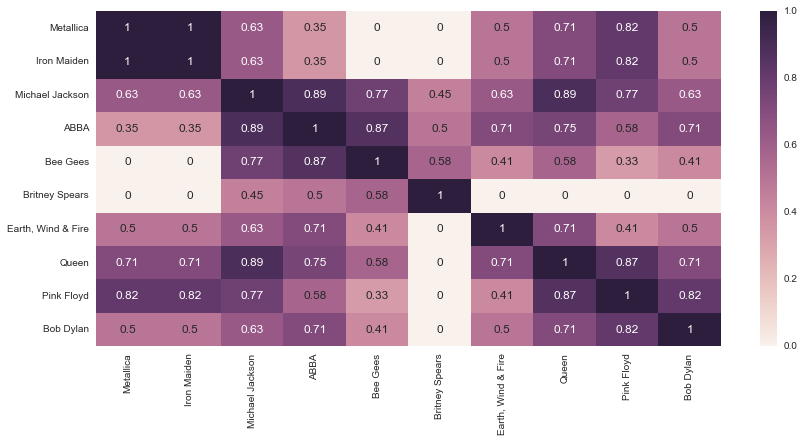

In [61]:
sns.heatmap(W,annot=True);
plt.xticks(np.arange(len_bands)+0.5,bands,rotation='vertical');
plt.yticks(np.arange(len_bands)+0.5,bands[::-1],rotation='horizontal');

## Plot band popularity
- cosine similarity is symmetric so can sum along rows or columns to produce bands overall popularity

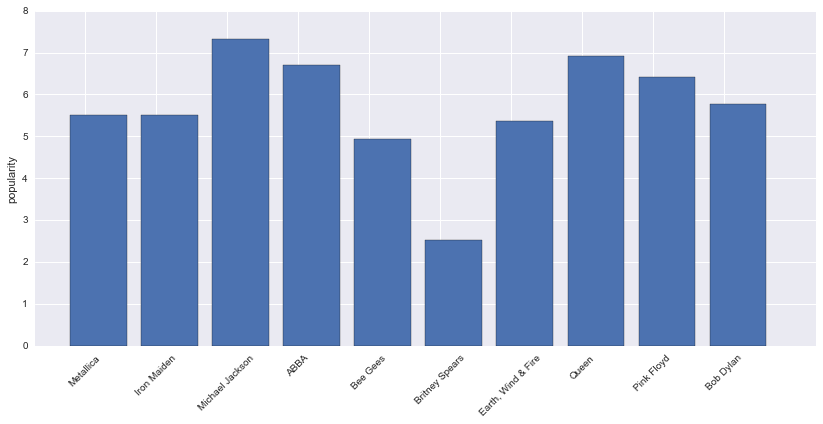

In [62]:
plt.bar(np.arange(len(bands)),W.sum(0));
plt.xticks(np.arange(len_bands)+0.2,bands,rotation=45);
plt.ylabel('popularity');
plt.xlim(-0.5,len(bands)+0.5);

## Recommendation of new band, given users previous history
- To predict band $i$, sum over all songs in user history for some function of song similarity matrix
- $$h_i = \sum_{j \in \{\text{song history} \}} \mathbf{U}(j) W_{ij}^q$$
- $q$ parameter that can be optimized. Acts as "clustering" parameter.

In [64]:
def hFunc(target_user_bands,q=1.):
    res = []
    for i in range(len(target_user_bands)):
        target_user_bands_temp = target_user_bands.copy()
        target_user_bands_temp[i] = 0 #same as nan as doesn't include in calculation.
        res.append(np.nansum(target_user_bands*W[:,i] ** q))
        
    
    return (np.array(res)-np.min(res))/(np.max(res)-np.min(res))

def plot(target_user_bands, q=1, c="b"):
    if isinstance(q,list):
        for qq in q:
            result = hFunc(target_user_bands,q=qq)
            plt.plot(result,'o-',label='q={}'.format(qq)); 
    else:
        result = hFunc(target_user_bands,q=q)
        plt.plot(result,'o-');        
    plt.plot(target_user_bands,'ko',ms=10);
    
    
    plt.xticks(np.arange(len_bands),bands,rotation=90);
    plt.xlim(-0.5, 9.5)
    plt.ylim(-0.2, 1.2)
    if isinstance(q,list):
        plt.legend()

## Example "user" 1

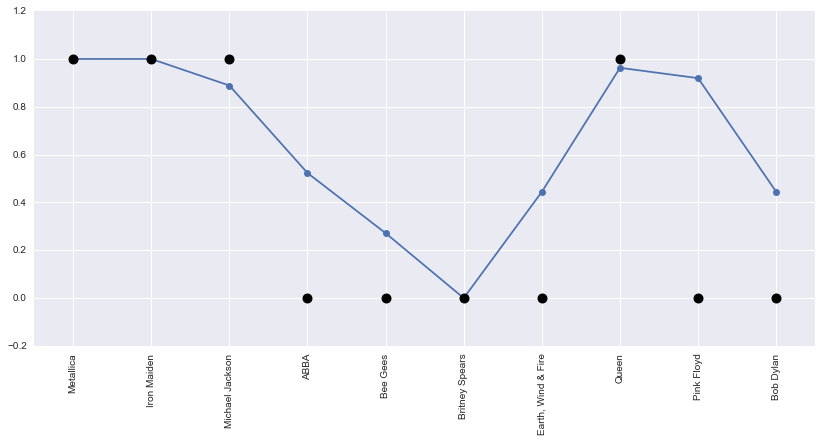

In [65]:
# I'm a rock and roll fanatic, but Pink Floyd is a little weird for me
target_user_bands = np.array([1,1,1,0,0,0,0,1,0,0])
plot(target_user_bands, q=2)

## Example "user" 2

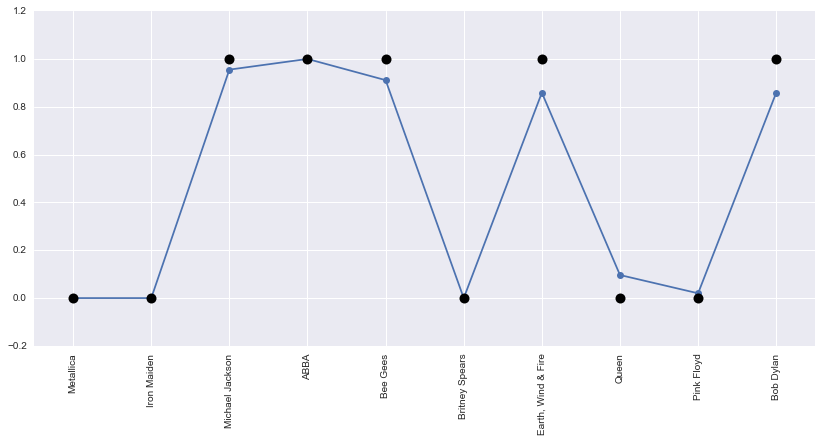

In [66]:
# I don't like angry music like hard rock and heavy metal - so no Metallica, Maiden, or Queen
# I think Britney Spears is crude, the music is just not delicate and intricate enough
target_user_bands = np.array([0,0,1,1,1,0,1,0,0,1])
plot(target_user_bands, q=20)

## Example "user" 3

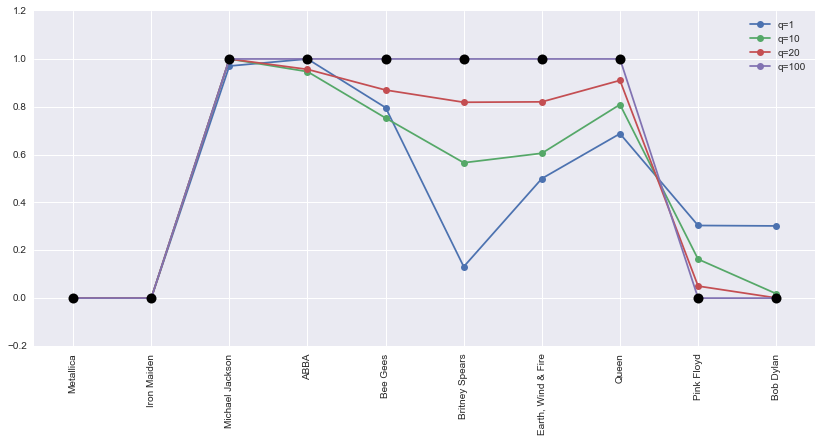

In [69]:
# I'm a pop monster ( and Queen counts )
target_user_bands = np.array([0,0,1,1,1,1,1,1,0,0])
plot(target_user_bands, q=[1,10,20,100])

## Generalized item similarity matrix
- Kaggle winner invented new item matrix
- Conditional probabilities provide more information (People who like Britney like MJ, but maybe people who like MJ don't necessarily like Brtiney?  )
- Can calculate conditional as:
$$P(i|j) = \frac{|\mathbf{U}(i)\cap\mathbf{U}(j)|}{|\mathbf{U}(j)|}$$
- Why not both?
$$P(i|j)^\alpha P(j|i)^{1-\alpha}$$
- $\alpha$ can vary between 0 and 1. At extremes, just conditional probability. At $1/2$, same as cosine similarity

In [92]:
def Wij(alpha):
    Pij = np.zeros((len_bands,len_bands))
    Pji = np.zeros((len_bands,len_bands))
    for i in range(len_bands):
        for j in range(len_bands):
            Pij[i,j] = np.sum(R[:,i]*R[:,j]).astype(float)/(np.sum(R[:,j]).astype(float)  )
            Pji[i,j] = np.sum(R[:,i]*R[:,j]).astype(float)/(np.sum(R[:,i]).astype(float)  )
    return (Pij ** alpha) * (Pji ** (1-alpha))



In [93]:
def hFuncW(Wt,target_user_bands,q=1.):
    res = []
    for i in range(len(target_user_bands)):
        target_user_bands_temp = target_user_bands.copy()
        target_user_bands_temp[i] = 0 #same as nan as doesn't include in calculation.
        res.append(np.nansum(target_user_bands*Wt[:,i] ** q))
        
    
    return (np.array(res)-np.min(res))/(np.max(res)-np.min(res))

def plota(target_user_bands, a=0.5, c="b"):
    if isinstance(a,list):
        for aa in a:
            result = hFuncW(Wij(aa),target_user_bands,q=10.0)
            plt.plot(result,'o-',label='a={}'.format(aa)); 
    else:
        result = hFunc(target_user_bands,q=10.0)
        plt.plot(result,'o-');        
    plt.plot(target_user_bands,'ko',ms=10);
    
    
    plt.xticks(np.arange(len_bands),bands,rotation=90);
    plt.xlim(-0.5, 9.5)
    plt.ylim(-0.2, 1.2)
    if isinstance(a,list):
        plt.legend()

## Example 3 again

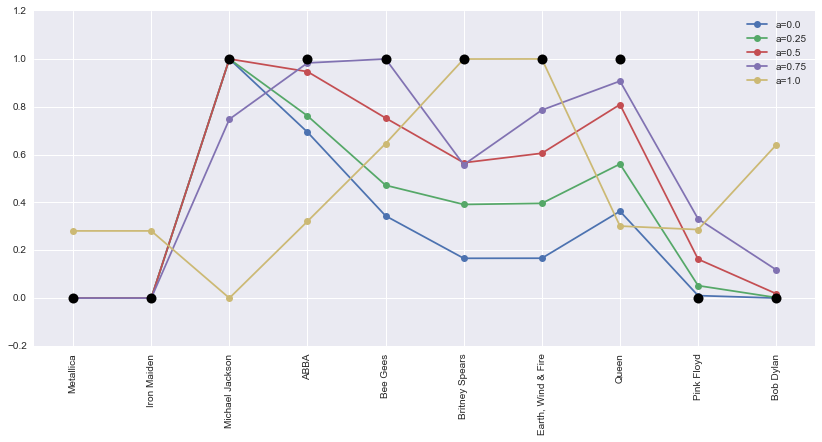

In [94]:
# I'm a pop monster ( and Queen counts )
target_user_bands = np.array([0,0,1,1,1,1,1,1,0,0])
plota(target_user_bands, a=[0.0,0.25,0.5,0.75,1.0])

# Ibrahim Jumkhawala, 4th
We (this is a team of 4 graduate students) tried many approaches, the one that worked best was using collaborative filtering.

For each song1 in users playlist get the song2 heard by maximum users along with song1. (get between 5-10 other songs for each song , I'm still not sure why picking up more decreases the score)

From the colisten file = > 
- song1 song2 user_count 
- song1 => in users playlist
- $|U(i) \cap U(j)|$ => number of users hearing song i and song j
- $r_{iu}$ => number of times user $u$ hears song i,  
- $\sum_i r_{iu}$ => Number of total listens user has in playlist

give each song2 a rating
rating = (( 1+ (song_count/totalCount)) * (user_count / (total number of users who heard song1) + user_count / (total number of users who heard song2)))
$$r = ( 1+ (r_{iu}/\sum_i r_{iu}))  (|U| / |U(i)| + |U| / |U(j)|)$$
- $|U(i)|$ users who heard song $i$
- $|U(j)|$ users who heard song $j$
-  number of users who heard 
Sort ratings for each song and recommend, replace leftover spaces with the most popular songs (heard by most users)

The triplet file is for one million users to give better results, song1 song2 1 have been deleted, two songs heard by only one user are removed from the file. the colisten matrix is stored on the file system in different files hashed on song1 name, so access is quick. Running the entire algo takes about 1.5 hours on a 4GB machine (4 processes).

[[Source code](https://github.com/ibby923/MSD-programs/tree/master/Final_Submission)]

## What did not work:
- Grouped artist similarity and predcited songs for similar artist, this does not work, ranks poorly.... (i still think using the whole metadata and grouping will give better results)
- Number of times user listens to song does not actally help, there is another post on kaggle saying why this data could be wrong.





# nhan vu, 5th

The single solution that gave me the 5rd position is based on the Adsorption algorithm from Youtube. I implemented a parallel version using multi-threading (8 threads) on a 16GB RAM, two quad core with hyper-threading. The parameters was chosen to discount popular items and greedy users who listened to many songs. I used all triplets from the taste dataset.
I reach the MAP@500 (public:0.15555/ private:0.15639) just within the first 10 days of the contest. After that, I tried many other approaches with no improvement :
- Re-rank suggestions from the Adsorption algorithm for each user based on the frequency of song years which he listened to. (0.09108/0.09081)
- Re-rank suggestions from the Adsorption algorithm for each user based on the frequency of artists whom he listened to. (0.13446/0.13420)
- Mahout ALS-WR for Implicit Feedback lambda=0.065 (0.05092/0.05099) on taste data. Just tried only 1 lambda value and give up, :(
- libFM MCMC, 100 iterations, init stdev 0.1 on taste data (0.01766/0.01721). Tried to add meta-data features (artists / tags) but it ate all memory quickly, :(
- Item similarity from Last.fm similar track db, padded with popularity-based suggestions if there is not enough suggestions (0.01167/0.01123)
- Artist and Tag item-similarity, Padded with popularity-based suggestions (0.01743/ 0.01683)



## Discussion Points
- Matrix factorization did not help. 
- Metadata did not help too. This contest is about solving a cold-start(?) problem and according to my knowledge, content-based algorithms do better than CF ones.
- Winning solution remarkably simple.
- Contest was in 2008. Would the solutions look different if it was to run again tomorrow?